# CallArgs

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('callargs')

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct', 'callarg__expertise_level' ]
TABLE_TARGET = 'callarg__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-17 11:23:15.405213 Loading data ...
2025-01-17 11:23:19.504526 Data successfully load!!
2025-01-17 11:23:19.504526 Creating data cache files ...
2025-01-17 11:23:19.638028 Data cache files successfully created!!
Features shape: (222756, 4)
Target shape: (222756,)
As we can see the downloaded data contains a total of 222756 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222756 entries, 0 to 222755
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           222756 non-null  int64  
 1   callarg__named_args_pct        222756 non-null  float64
 2   callarg__double_star_args_pct  222756 non-null  float64
 3   callarg__expertise_level       222756 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.8+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 222756 entries, 0 to 222755
Series name: callarg__expertise_level
Non-Null Count   Dtype 
--------------   ----- 
222756 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Equilibrado de clases

In [25]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 53.26% instances for BEGINNER class and 46.74% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
callarg__expertise_level         0
dtype: int64

In [5]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct


callarg__expertise_level
------------------------
0 instancias no tienen un valor para la columna callarg__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
callarg__number_args,222756.0,NaN,NaN,NaN,1.279593,1.159029,0.0,1.0,1.0,2.0,49.0
callarg__named_args_pct,222756.0,NaN,NaN,NaN,0.110113,0.291206,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,222756.0,NaN,NaN,NaN,0.000184,0.01099,0.0,0.0,0.0,0.0,1.0
callarg__expertise_level,222756,2,BEGINNER,118633,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 124827   56.037548
           [2.0_inf]  60142   26.999048
           [0.0_1.0)  37787   16.963404

callarg__named_args_pct  count  percentage
              [0.0_0.0] 192245    86.30295
              [0.0_inf]  30511    13.69705

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 222677   99.964535
                    [0.0_inf]     79    0.035465

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (222756, 5)
Target shape: (222756,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

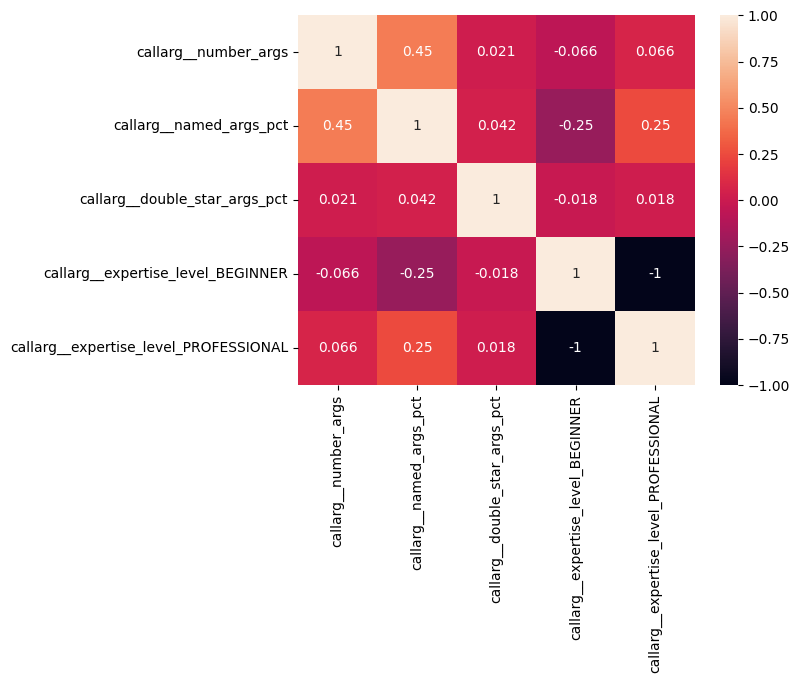

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 49. Con una media de 1.279.

<Axes: ylabel='callarg__number_args'>

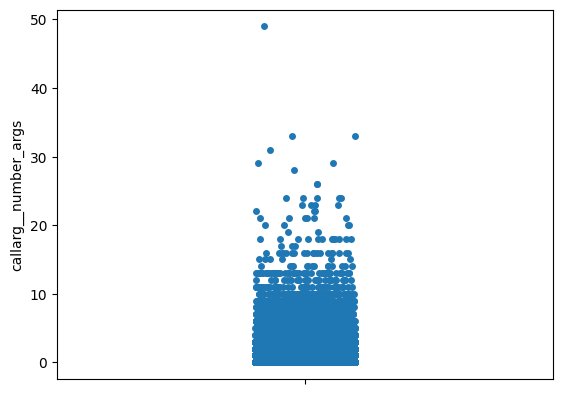

In [10]:
sns.stripplot(X['callarg__number_args'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

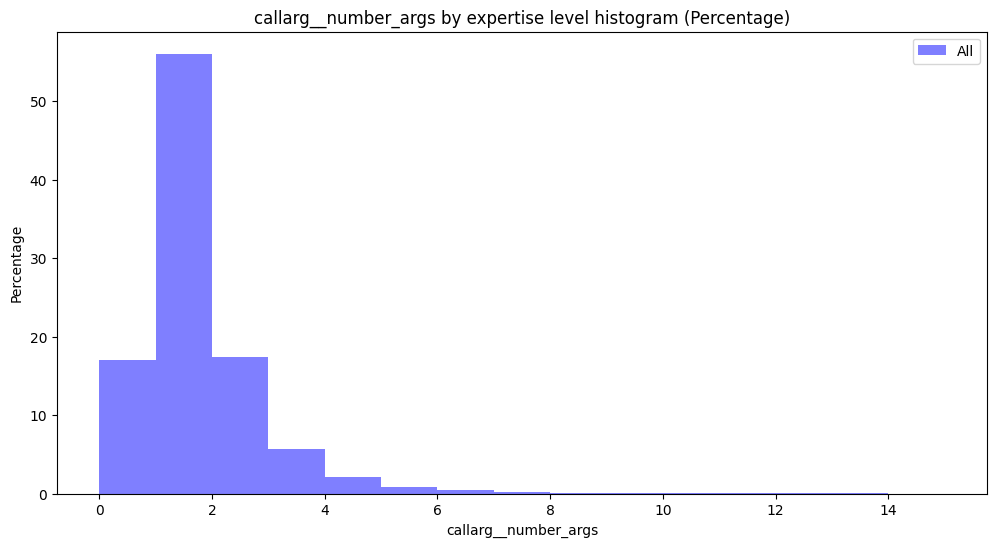

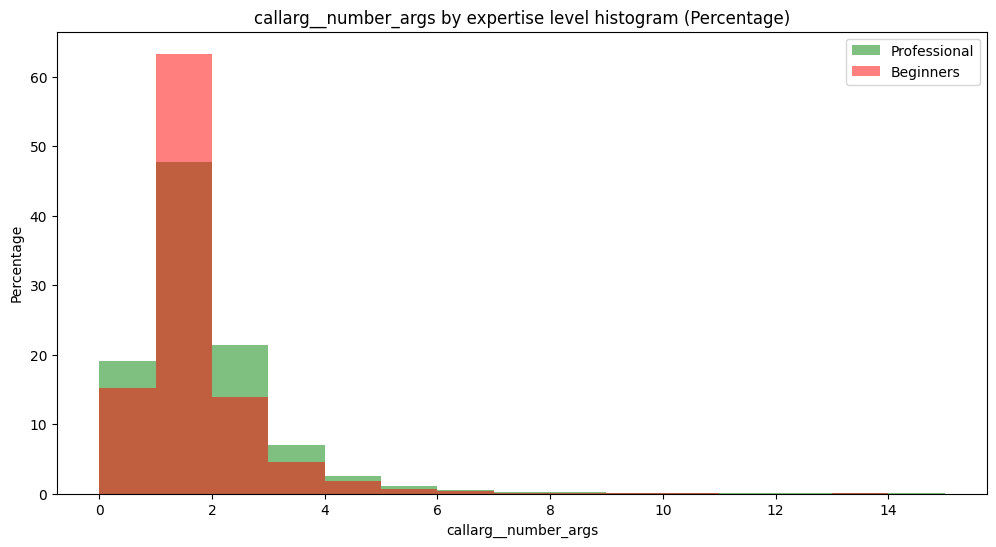

In [11]:
print_histogram(X, 'callarg__number_args', 'callarg__expertise_level', bins=15, include_all=True, include_beginners=False, include_experts=False, max_value=15)
print_histogram(X, 'callarg__number_args', 'callarg__expertise_level', bins=15, include_all=False, max_value=15)

In [12]:
print_outliers_for_df_column(X, 'callarg__number_args')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9034348767215611
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9364899399989021,57.65681961705448]
-3.0IQR: 0 instancias tienen un valor para callarg__number_args inferior a -2.0 (Q1-3*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__number_args inferior a -0.5 (Q1-1.5*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
+1.5IQR: 8783 instancias tienen un valor para callarg__number_args superior a 3.5 (Q3+1.5*IQR) para callarg__number_args. Representando un 3.943% del total de instancias.
+3.0IQR: 2023 instancias tienen un valor para callarg__number_args superior a 5.0 (Q3-3*IQR) para callarg__number_args. Representando un 0.9082% del total de instancias.
L: 37787 instancias tienen un valor para callarg__number_args

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 90 usamos Tuckey Extremo)

In [13]:
X[X['callarg__number_args'] > 5.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_PROFESSIONAL
count,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000
mean,7.848740,0.544783,0.000082,0.398418,0.601582
std,3.166163,0.443354,0.003706,0.489693,0.489693
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.833333,0.000000,0.000000,1.000000
75%,8.000000,1.000000,0.000000,1.000000,1.000000
max,49.000000,1.000000,0.166667,1.000000,1.000000


### IMPORTANTE
Hay que revisar el valor extremo

### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.11.

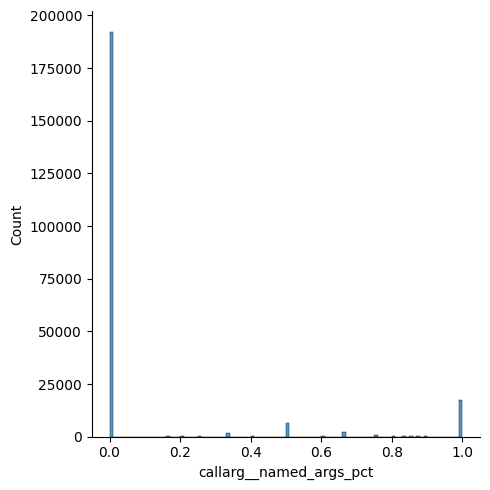

In [14]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

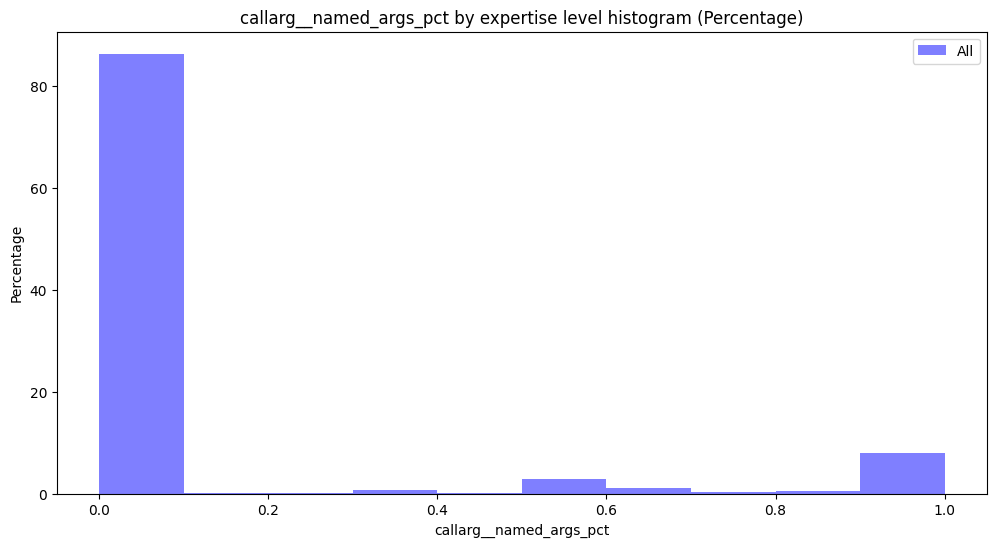

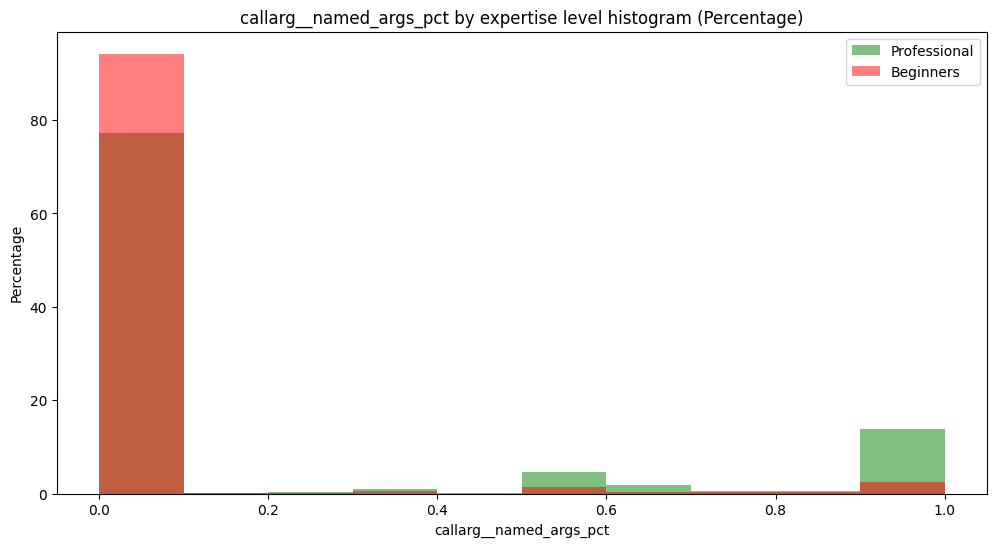

In [15]:
print_histogram(X, 'callarg__named_args_pct', 'callarg__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False, max_value=40)
print_histogram(X, 'callarg__named_args_pct', 'callarg__expertise_level', bins=10, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7558798751710321
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 30511 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__named_args_pct. Representando un 13.7% del total de instancias.
+3.0IQR: 30511 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3-3*IQR) para callarg__named_args_pct. Representando un 13.7% del total de instancias.
L: 0 instancias tienen un valor para callarg__named_args_pct inferior a

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [17]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_PROFESSIONAL
count,30511.000000,30511.000000,30511.000000,30511.000000,30511.000000
mean,2.622267,0.803917,0.001194,0.224444,0.775556
std,1.707538,0.247701,0.027823,0.417222,0.417222
min,1.000000,0.020408,0.000000,0.000000,0.000000
25%,2.000000,0.500000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,0.000000,1.000000
max,49.000000,1.000000,1.000000,1.000000,1.000000


### Variable double_star_args_pct (3/3)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0. La media es 0.000184.

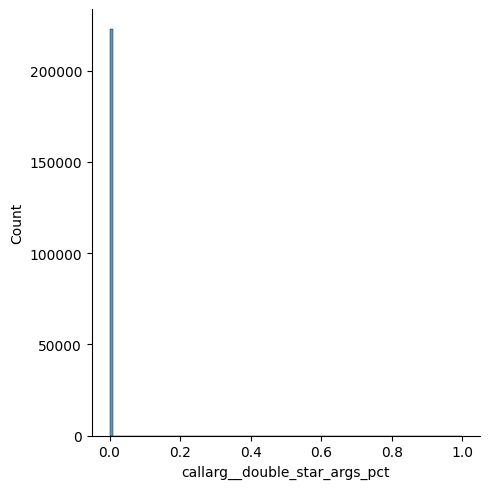

In [18]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

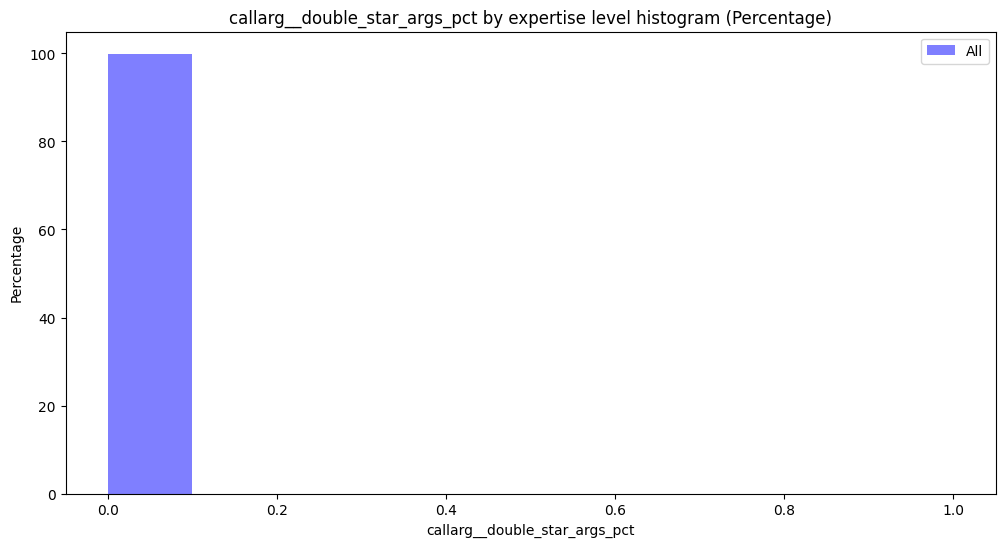

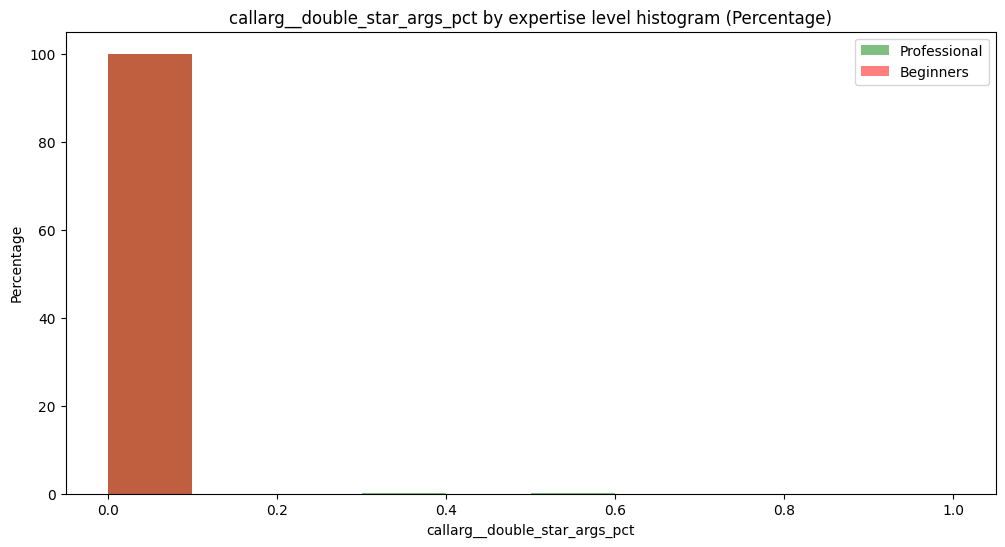

In [19]:
print_histogram(X, 'callarg__double_star_args_pct', 'callarg__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False, max_value=40)
print_histogram(X, 'callarg__double_star_args_pct', 'callarg__expertise_level', bins=10, include_all=False)

In [20]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9915478208730546
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 79 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__double_star_args_pct. Representando un 0.03546% del total de instancias.
+3.0IQR: 79 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3-3*IQR) para callarg__double_star_args_pct. Representando un 0.03546% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [21]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_PROFESSIONAL
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,2.430380,0.724473,0.518143,0.050633,0.949367
std,1.105737,0.311471,0.270383,0.220648,0.220648
min,1.000000,0.000000,0.166667,0.000000,0.000000
25%,2.000000,0.666667,0.333333,0.000000,1.000000
50%,2.000000,0.666667,0.500000,0.000000,1.000000
75%,3.000000,1.000000,0.500000,0.000000,1.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000


## Multivariate

Isolation forest algorithm

In [22]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level
6511,13,1.000000,0.0,PROFESSIONAL
6631,11,1.000000,0.0,PROFESSIONAL
9675,11,1.000000,0.0,PROFESSIONAL
14112,26,1.000000,0.0,PROFESSIONAL
14262,11,1.000000,0.0,PROFESSIONAL
...,...,...,...,...
217365,13,0.923077,0.0,BEGINNER
217382,13,0.923077,0.0,BEGINNER
217385,13,0.923077,0.0,BEGINNER
217388,13,0.923077,0.0,BEGINNER


### IMPORTANTE
Revisar los outliers

In [23]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,257.0,13.357977,4.656592,8.0,10.000000,12.000000,15.0,33.0
callarg__named_args_pct,257.0,0.838482,0.294070,0.0,0.888889,0.923077,1.0,1.0
callarg__double_star_args_pct,257.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
callarg__expertise_level_BEGINNER,257.0,0.389105,0.488499,0.0,0.000000,0.000000,1.0,1.0
callarg__expertise_level_PROFESSIONAL,257.0,0.610895,0.488499,0.0,0.000000,1.000000,1.0,1.0


In [24]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,222499.0,1.265642,1.072962,0.0,1.0,1.0,2.0,49.0
callarg__named_args_pct,222499.0,0.109272,0.290148,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,222499.0,0.000184,0.010996,0.0,0.0,0.0,0.0,1.0
callarg__expertise_level_BEGINNER,222499.0,0.532735,0.498928,0.0,0.0,1.0,1.0,1.0
callarg__expertise_level_PROFESSIONAL,222499.0,0.467265,0.498928,0.0,0.0,0.0,1.0,1.0
